In [1]:
import os

import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import shapely.geometry

from database import data_utils, shape_utils

In [2]:
# Read KCM data
kcm_shape_data = pd.read_csv("../data/kcm_gtfs/2022_12_26/shapes.txt")
kcm_shape_data = shape_utils.get_consecutive_values(kcm_shape_data)

# Read Norway data, filter to only AtB (there are a lot of segments in the whole country)
atb_shape_data = pd.read_csv("../data/nwy_gtfs/2023_02_12_atb/shapes.txt")
atb_shape_data = shape_utils.get_consecutive_values(atb_shape_data)

In [3]:
# For each unique line segment in the route shapes, get a lookup for the shape_ids that use that segment
kcm_lookup = shape_utils.create_shape_segment_lookup(kcm_shape_data)
atb_lookup = shape_utils.create_shape_segment_lookup(atb_shape_data)

/Users/zack/miniconda3/envs/valle_m1/lib/python3.10/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)
/Users/zack/miniconda3/envs/valle_m1/lib/python3.10/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


<AxesSubplot: >

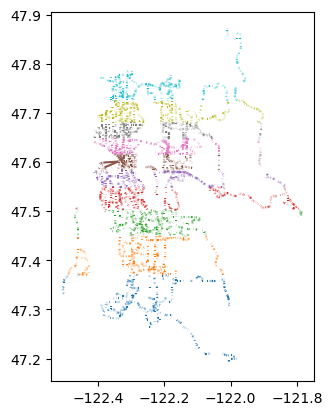

In [4]:
# Get line geometries, plot a sample
kcm_segments = shape_utils.get_unique_line_geometries(kcm_shape_data)
kcm_segments.sample(10000).plot(column='segment_id')

/Users/zack/miniconda3/envs/valle_m1/lib/python3.10/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)
/Users/zack/miniconda3/envs/valle_m1/lib/python3.10/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


<AxesSubplot: >

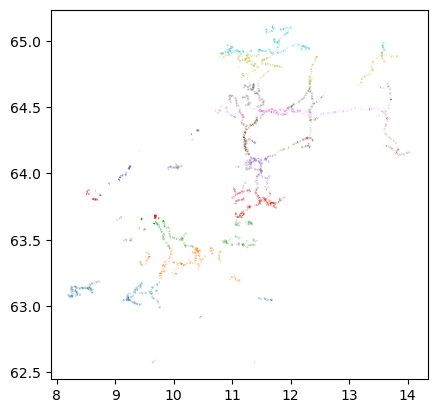

In [5]:
# Get line geometries, plot a sample
atb_segments = shape_utils.get_unique_line_geometries(atb_shape_data)
atb_segments.sample(10000).plot(column='segment_id')

In [6]:
# Save the exploded route network and lookup to file
outdir = "../data/processed_networks/"

# Save KCM
outfile = "kcm_segments"
with open(f"{outdir}/{outfile}.pkl", 'wb') as f:
    pickle.dump(kcm_segments, f)
outfile = "kcm_lookup"
with open(f"{outdir}/{outfile}.pkl", 'wb') as f:
    pickle.dump(kcm_lookup, f)

# Save Norway
outfile = "atb_segments"
with open(f"{outdir}/{outfile}.pkl", 'wb') as f:
    pickle.dump(atb_segments, f)
outfile = "atb_lookup"
with open(f"{outdir}/{outfile}.pkl", 'wb') as f:
    pickle.dump(atb_lookup, f)